In [1]:
# library untuk mengolah data
import pandas as pd
import numpy as np

# library untuk data visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# library untuk data preprosesing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# library untuk membuat model
import tensorflow as tf
from keras.layers import Dense, LSTM

In [2]:
df = pd.read_csv('Measurement_summary.csv')
df.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


In [3]:
df.info

<bound method DataFrame.info of         Measurement date  Station code  \
0       2017-01-01 00:00           101   
1       2017-01-01 01:00           101   
2       2017-01-01 02:00           101   
3       2017-01-01 03:00           101   
4       2017-01-01 04:00           101   
...                  ...           ...   
647506  2019-12-31 19:00           125   
647507  2019-12-31 20:00           125   
647508  2019-12-31 21:00           125   
647509  2019-12-31 22:00           125   
647510  2019-12-31 23:00           125   

                                                  Address   Latitude  \
0       19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   
1       19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   
2       19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   
3       19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   
4       19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   
...                            

In [4]:
rows = df.shape[0]
columns = df.shape[1]

print('Jumlah Baris: ' + str(rows))
print('Jumlah Kolom: ' + str(columns))

Jumlah Baris: 647511
Jumlah Kolom: 11


In [5]:
df.columns

Index(['Measurement date', 'Station code', 'Address', 'Latitude', 'Longitude',
       'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5'],
      dtype='object')

In [6]:
# Mengecek jumlah missing value pada setiap kolom
df.isnull().sum()

Measurement date    0
Station code        0
Address             0
Latitude            0
Longitude           0
SO2                 0
NO2                 0
O3                  0
CO                  0
PM10                0
PM2.5               0
dtype: int64

In [7]:
# Mengecek jumlah nilai unik dari setiap kolom
df.nunique()

Measurement date    25906
Station code           25
Address                25
Latitude               25
Longitude              25
SO2                   186
NO2                   132
O3                    253
CO                    172
PM10                  551
PM2.5                 333
dtype: int64

In [8]:
# Statistik dasar dalam data bersifat numerik
df.describe()

,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
count,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000
mean,113.000221,37.553484,126.989340,-0.001795,0.022519,0.017979,0.509197,43.708051,25.411995
std,7.211315,0.053273,0.078790,0.078832,0.115153,0.099308,0.405319,71.137342,43.924595
min,101.000000,37.452357,126.835151,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,107.000000,37.517528,126.927102,0.003000,0.016000,0.008000,0.300000,22.000000,11.000000
50%,113.000000,37.544962,127.004850,0.004000,0.025000,0.021000,0.500000,35.000000,19.000000
75%,119.000000,37.584848,127.047470,0.005000,0.038000,0.034000,0.600000,53.000000,31.000000
max,125.000000,37.658774,127.136792,3.736000,38.445000,33.600000,71.700000,3586.000000,6256.000000


Text(0.5, 1.0, 'PM2.5 plot')

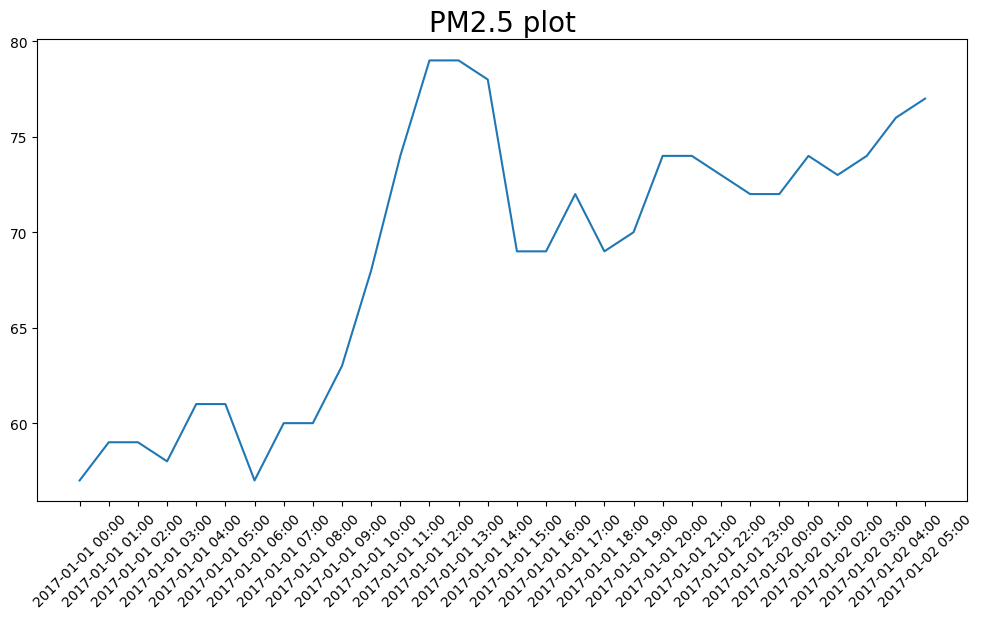

In [9]:
# Membuat dan menampilkan plot untuk menampilkan nilai dari PM2.5
dates = df['Measurement date'].values[:30]
pollutan = df['PM2.5'].values[:30]

plt.figure(figsize=(12, 6))
plt.plot(dates, pollutan)
plt.xticks(rotation=45)
plt.title('PM2.5 plot' , fontsize=20)

In [10]:
#Menghapus kolom yang tidak digunakan
df = df.drop(['Station code', 'Address', 'Latitude', 'Longitude','SO2', 'NO2', 'O3', 'CO', 'PM10','Measurement date'], axis=1)

In [11]:
df.head()

,PM2.5
0,57.0
1,59.0
2,59.0
3,58.0
4,61.0


<Axes: xlabel='PM2.5'>

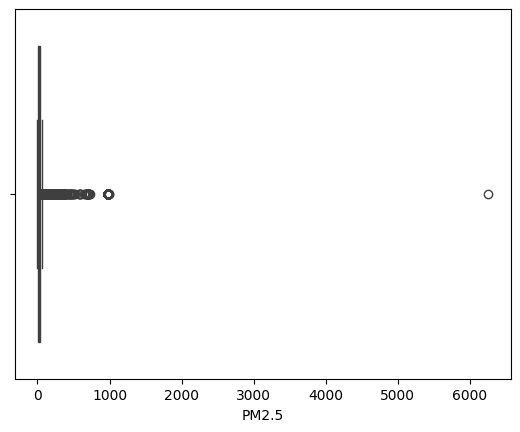

In [12]:
# Mencari outliers
sns.boxplot(x=df['PM2.5'])

In [13]:
# Menghapus outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [14]:
# Cek shape dataset setelah menghapus outliers
df.shape

(616047, 1)

<Axes: xlabel='PM2.5'>

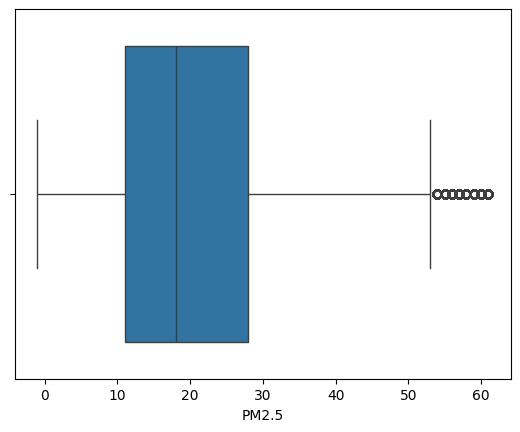

In [15]:
# Cek ulang outlier
sns.boxplot(x=df['PM2.5'])

In [16]:
# Me-spliting dataset untuk pemodelan
values = df.values
train, test = train_test_split(values, test_size= 0.2, random_state=42, shuffle=False)

In [17]:
test.shape

(123210, 1)

In [18]:
test

array([[40.],
       [40.],
       [42.],
       ...,
       [17.],
       [18.],
       [18.]])

In [19]:
train.shape

(492837, 1)

In [20]:
train

array([[57.],
       [59.],
       [59.],
       ...,
       [59.],
       [60.],
       [43.]])

In [53]:
# Kita buat data menjadi lebih sederhana dengan bantuan min max scaler
scaled_train = min_max_scaler.fit_transform(train)
scaled_test = min_max_scaler.fit_transform(test)

In [54]:
scaled_test

array([[0.66129032],
       [0.66129032],
       [0.69354839],
       ...,
       [0.29032258],
       [0.30645161],
       [0.30645161]])

In [23]:
# Membuat generator untuk melakukan prediksi kedepan
n_input = 30
n_feature = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length= n_input, batch_size=128)
test_generator = TimeseriesGenerator(scaled_test, scaled_test, length= n_input, batch_size= 128)

In [24]:
# Membuat model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, activation= "relu", return_sequences= True, input_shape=(n_input, n_feature)),
    tf.keras.layers.LSTM(60, activation= "relu", return_sequences= True),
    tf.keras.layers.Dense(30, activation= "relu"),
    tf.keras.layers.Dense(10, activation= "relu"),
    tf.keras.layers.Dense(1),
])

c:\Users\asus_\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 60)         │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30, 30)         │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30, 10)         │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30, 1)          │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,191 (153.09 KB)

 Trainable params: 39,191 (153.09 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Compiling model
optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3, momentum = 0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=['mae'])

In [27]:
# Training model dengan 10 epoch
history = model.fit(generator, epochs=10)

Epoch 1/10


c:\Users\asus_\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3851/3851 ━━━━━━━━━━━━━━━━━━━━ 382s 97ms/step - loss: 0.0241 - mae: 0.1714
Epoch 2/10
3851/3851 ━━━━━━━━━━━━━━━━━━━━ 204s 53ms/step - loss: 0.0169 - mae: 0.1425
Epoch 3/10
3851/3851 ━━━━━━━━━━━━━━━━━━━━ 99s 26ms/step - loss: 0.0161 - mae: 0.1373
Epoch 4/10
3851/3851 ━━━━━━━━━━━━━━━━━━━━ 73s 19ms/step - loss: 0.0160 - mae: 0.1367
Epoch 5/10
3851/3851 ━━━━━━━━━━━━━━━━━━━━ 71s 19ms/step - loss: 0.0160 - mae: 0.1359
Epoch 6/10
3851/3851 ━━━━━━━━━━━━━━━━━━━━ 92s 24ms/step - loss: 0.0158 - mae: 0.1355
Epoch 7/10
3851/3851 ━━━━━━━━━━━━━━━━━━━━ 82s 21ms/step - loss: 0.0160 - mae: 0.1362
Epoch 8/10
3851/3851 ━━━━━━━━━━━━━━━━━━━━ 81s 21ms/step - loss: 0.0160 - mae: 0.1362
Epoch 9/10
3851/3851 ━━━━━━━━━━━━━━━━━━━━ 81s 21ms/step - loss: 0.0159 - mae: 0.1355
Epoch 10/10
3851/3851 ━━━━━━━━━━━━━━━━━━━━ 81s 21ms/step - loss: 0.0159 - mae: 0.1356


In [28]:
 # Membuat model CNN
 model_CNN = tf.keras.models.Sequential([
     tf.keras.layers.Conv1D(filters = 32, kernel_size = 5, strides=1, padding="causal", activation='relu', input_shape = (n_input, n_feature)),
     tf.keras.layers.MaxPooling1D(pool_size = 2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dense(10, activation='relu'),
     tf.keras.layers.Dense(1)
 ])

c:\Users\asus_\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model_CNN.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 30, 32)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 15, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        30,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,637 (123.58 KB)

 Trainable params: 31,637 (123.58 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Compiling model
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9)
model_CNN.compile(loss = tf.keras.losses.Huber(),
                  optimizer = optimizer,
                  metrics=['mae'])

In [31]:
# Training model dengan 10 epoch
history_CNN = model_CNN.fit(generator, epochs= 10)

Epoch 1/10
3851/3851 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0264 - mae: 0.1734
Epoch 2/10
3851/3851 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0128 - mae: 0.1245
Epoch 3/10
3851/3851 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0110 - mae: 0.1129
Epoch 4/10
3851/3851 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0100 - mae: 0.1061
Epoch 5/10
3851/3851 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0091 - mae: 0.0998
Epoch 6/10
3851/3851 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0087 - mae: 0.0966
Epoch 7/10
3851/3851 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0083 - mae: 0.0938
Epoch 8/10
3851/3851 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0079 - mae: 0.0907
Epoch 9/10
3851/3851 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0075 - mae: 0.0883
Epoch 10/10
3851/3851 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0073 - mae: 0.0868


In [32]:
# Membuat prediksi menggunakan model dengan metric terbaik
model_CNN.evaluate(test_generator, verbose= 0)

[0.007643378339707851, 0.08957290649414062]

In [34]:
predictions = model_CNN.predict(test_generator) 

963/963 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step


In [35]:
predictions.shape[0]

123180

In [36]:
predictions

array([[0.8108524 ],
       [0.846817  ],
       [0.84091794],
       ...,
       [0.30303556],
       [0.2903585 ],
       [0.2851648 ]], dtype=float32)

Text(0, 0.5, 'Loss')

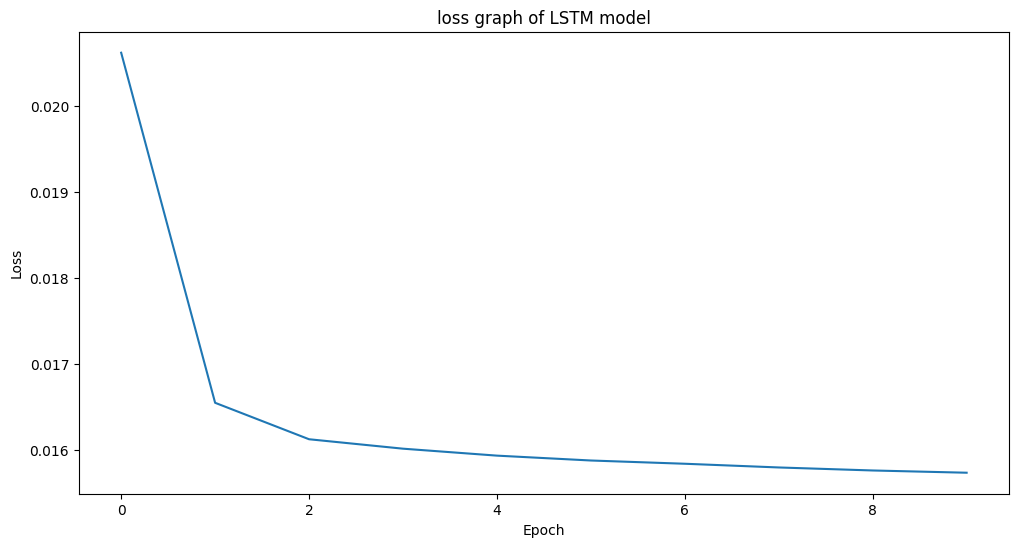

In [37]:
# Menampilkan plot loss pada proses training
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.title('loss graph of LSTM model')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'MAE')

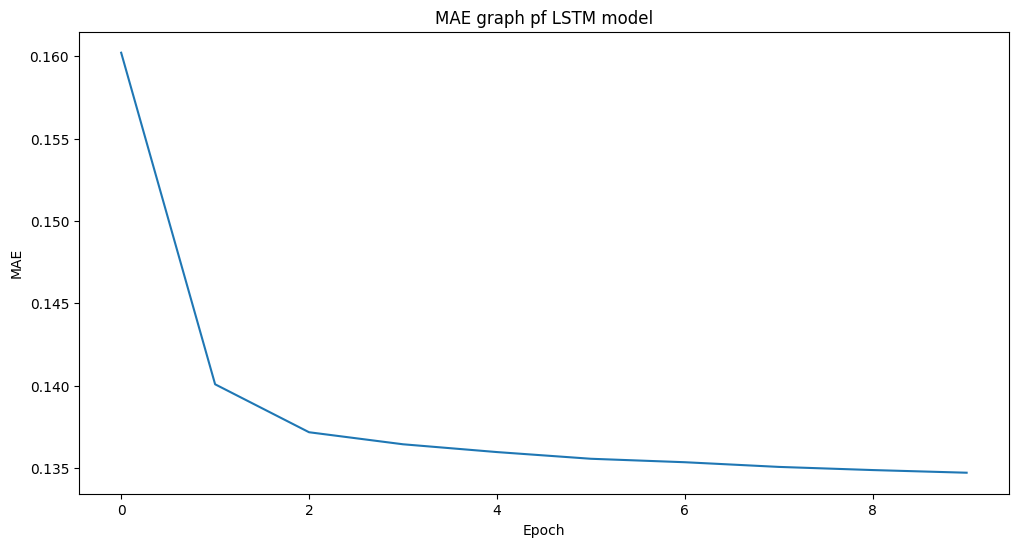

In [38]:
# Menampilkan plot MAE pada proses training
plt.figure(figsize=(12,6))
plt.plot(history.history['mae'], label='Train MAE')
plt.title('MAE graph pf LSTM model')
plt.xlabel('Epoch')
plt.ylabel('MAE')

In [39]:
# Plot untuk hasil prediksi menggunakan  model CNN
test[:,1:][n_input:]

array([], shape=(123180, 0), dtype=float64)

In [41]:
df_predict = pd.concat([pd.DataFrame(predictions), pd.DataFrame(test[:,1:][n_input:])], axis=1)

In [49]:
df_predict

,0
0,0.810852
1,0.846817
2,0.840918
3,0.828766
4,0.822565
...,...
123175,0.302218
123176,0.297494
123177,0.303036
123178,0.290359


In [50]:
min_max_scaler = MinMaxScaler()

In [55]:
dfnew = min_max_scaler.inverse_transform(df_predict)

In [57]:
dfnew

array([[49.27285 ],
       [51.502655],
       [51.136913],
       ...,
       [17.788204],
       [17.002228],
       [16.680218]], dtype=float32)

In [58]:
df_final = df[predictions.shape[0]*-1:]
df_final.count()

PM2.5    123180
dtype: int64

In [60]:
df_final['PM2.5_predict'] = dfnew[:,0]
df_final

C:\Users\asus_\AppData\Local\Temp\ipykernel_17108\3285331813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['PM2.5_predict'] = dfnew[:,0]


,PM2.5,PM2.5_predict
517445,59.0,49.272850
517446,58.0,51.502655
517447,53.0,51.136913
517448,52.0,50.383461
517449,8.0,49.999012
...,...,...
647506,17.0,17.737513
647507,19.0,17.444597
647508,17.0,17.788204
647509,18.0,17.002228


<Axes: >

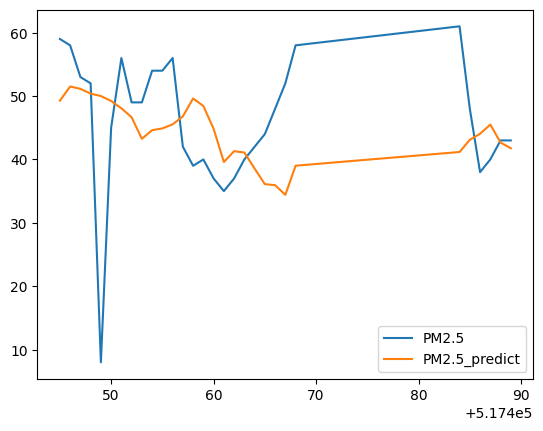

In [61]:
df_final[['PM2.5', 'PM2.5_predict']][:30].plot()